In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch

In [ ]:
# Importamos el dataset:
Events_detection = pd.read_csv('Sample_Game_1_RawEventsData.csv')

In [ ]:
# Vemos la forma del dataset:
Events_detection.shape

(1745, 14)

In [ ]:
# Vamos a inspeccionar la cantidad de nulos que tenemos por columna:
Events_detection.isnull().sum()

Team                0
Type                0
Subtype           953
Period              0
Start Frame         0
Start Time [s]      0
End Frame           0
End Time [s]        0
From                0
To                946
Start X            81
Start Y            81
End X             636
End Y             636
dtype: int64

In [ ]:
# Inspeccionamos ahora un poco los distintos tipos de eventos que podemos encontrar
Events_detection['Type'].unique()

array(['SET PIECE', 'PASS', 'BALL LOST', 'RECOVERY', 'CHALLENGE',
       'BALL OUT', 'SHOT', 'FAULT RECEIVED', 'CARD'], dtype=object)

### Se puede usar la función de abajo por si quieres sacar los subtipos de cualquiera de los tipos de evento:

In [ ]:
# Creamos una función para poder ver los distintos subtipos de evento por cada uno de los tipos generales de evento principal:
def Subtipos_evento (Evento):
    print(
        Events_detection[
        (Events_detection['Type'] == f'{Evento}') 
        ]['Subtype'].unique()
    )

In [ ]:
Subtipos_evento('SHOT')

['HEAD-ON TARGET-GOAL' 'OFF TARGET-OUT' 'ON TARGET-SAVED'
 'HEAD-OFF TARGET-OUT' 'HEAD-ON TARGET-SAVED' 'BLOCKED'
 'HEAD-WOODWORK-OUT' 'ON TARGET-GOAL' 'OFF TARGET']


### Dejo también esta función para sacar los datos relativos a cualquiler jugador, con cualquier equipo y de cualquier tipo de evento:

In [ ]:
def Sacar_datos_jugador (Evento = None, Subevento = None, Equipo = None, Jugador = None):
    if Evento:
        df_jugador = Events_detection[
            (Events_detection['Type'] == f'{Evento}')
        ]
    if Subevento:
        df_jugador = df_jugador[
            (Events_detection['Subtype'].str.contains(f'{Subevento}', case=False, na=False) )
        ]
    if Equipo:
        df_jugador = df_jugador[
            Events_detection['Team'] == f'{Equipo}'
        ]
    if Jugador:
        df_jugador = df_jugador[
            Events_detection['From'].str.contains(f'{Jugador}', case=False, na=False)
        ]

In [ ]:
# Vamos a crear una función que nos permita visualizar cualquier tipo de evento y subevento que queramos:
def Visualizacion_Eventos(Evento_principal, Subevento = None, Equipo = None, Jugador = None):
  
    # Primero seleccionamos del dataset los datos que se seleccionan:
    df_Eventos = Events_detection[
        (Events_detection['Type'] == f'{Evento_principal}')
    ]
    # Por si no queremos poner un subtipo de evento, Equipo o jugador:
    if Subevento:
        df_Eventos = df_Eventos[
            df_Eventos['Subtype'].str.contains(f'{Subevento}', case=False, na=False)
        ]
    
    if Equipo:
        df_Eventos = df_Eventos[
            df_Eventos['Team'] == f'{Equipo}'
        ]
    
    if Jugador:
        df_Eventos = df_Eventos[
            df_Eventos['From'].str.contains(f'{Jugador}', case=False, na=False)
        ]
    # Depende del tip de evento, se dibujará con una flecha o con un punto en el mapa:
    df_Eventos_flechas = df_Eventos[
        df_Eventos['End X'].notna() & df_Eventos['End Y'].notna()
    ]
    
    df_Eventos_puntos = df_Eventos[
        df_Eventos['End X'].isna() | df_Eventos['End Y'].isna()
    ]
    
    # Ahora vamos a dibujar el campo para dibujar el evento:
    pitch = Pitch(pitch_type = 'statsbomb', pitch_color='grass', line_color = 'white')
    fig, ax = pitch.draw(figsize=(12,8))
    
    # Ahora dibujamos en función de si requiere líneas o requiere puntos:
    if not df_Eventos_flechas.empty:
        pitch.arrows(
            df_Eventos_flechas['Start X'] * 115, df_Eventos_flechas['Start Y'] * 78,
            df_Eventos_flechas['End X'] * 115, df_Eventos_flechas['End Y'] * 78,
            ax = ax, color = 'blue', width = 1.5, headwidth = 4, alpha = 0.6, label = f'{Equipo}'
        )
    
    if not df_Eventos_puntos.empty:
        pitch.scatter(
            df_Eventos_puntos['Start X'] * 115, df_Eventos_puntos['Start Y'] * 78,
            ax = ax, color = 'red', s = 80, alpha = 0.8, edgecolors = 'black'
        )
    
    # Ahora ponemos los títulos:
    plt.title(f"{Evento_principal} - {Subevento} | {Equipo} | {Jugador}", fontsize=14)
    plt.tight_layout()
    plt.show()

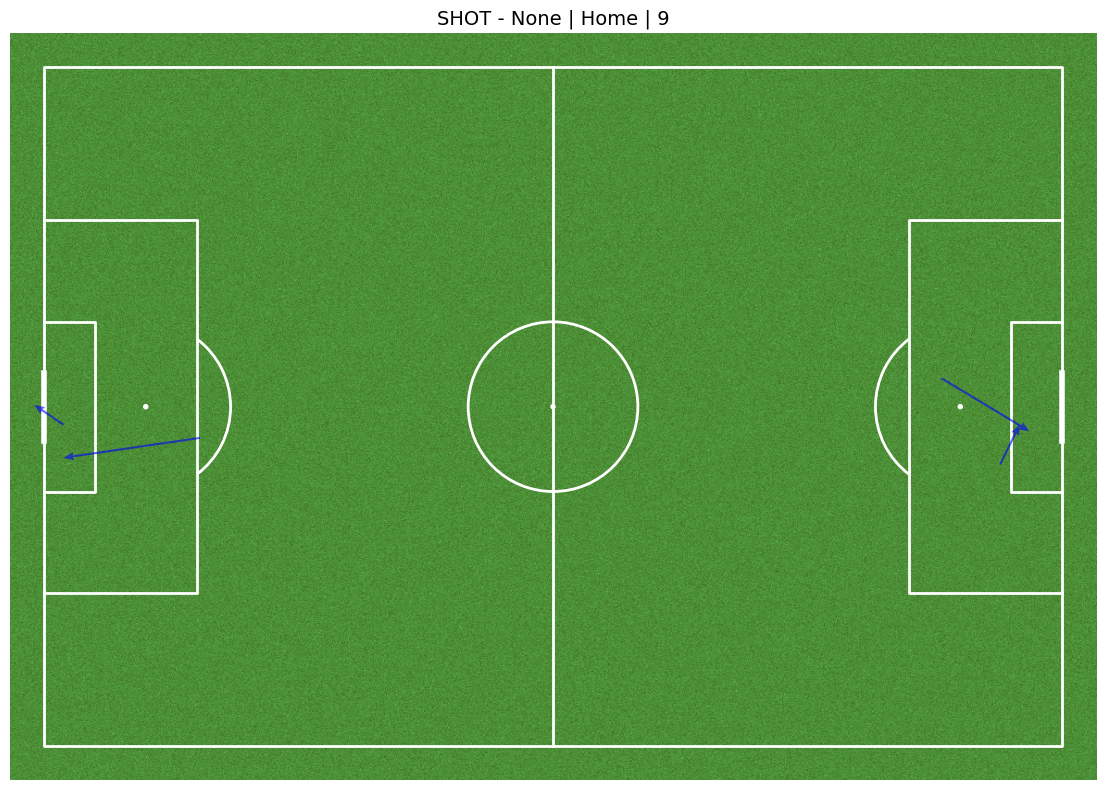

In [ ]:
Visualizacion_Eventos('SHOT', Equipo = 'Home', Jugador= '9')

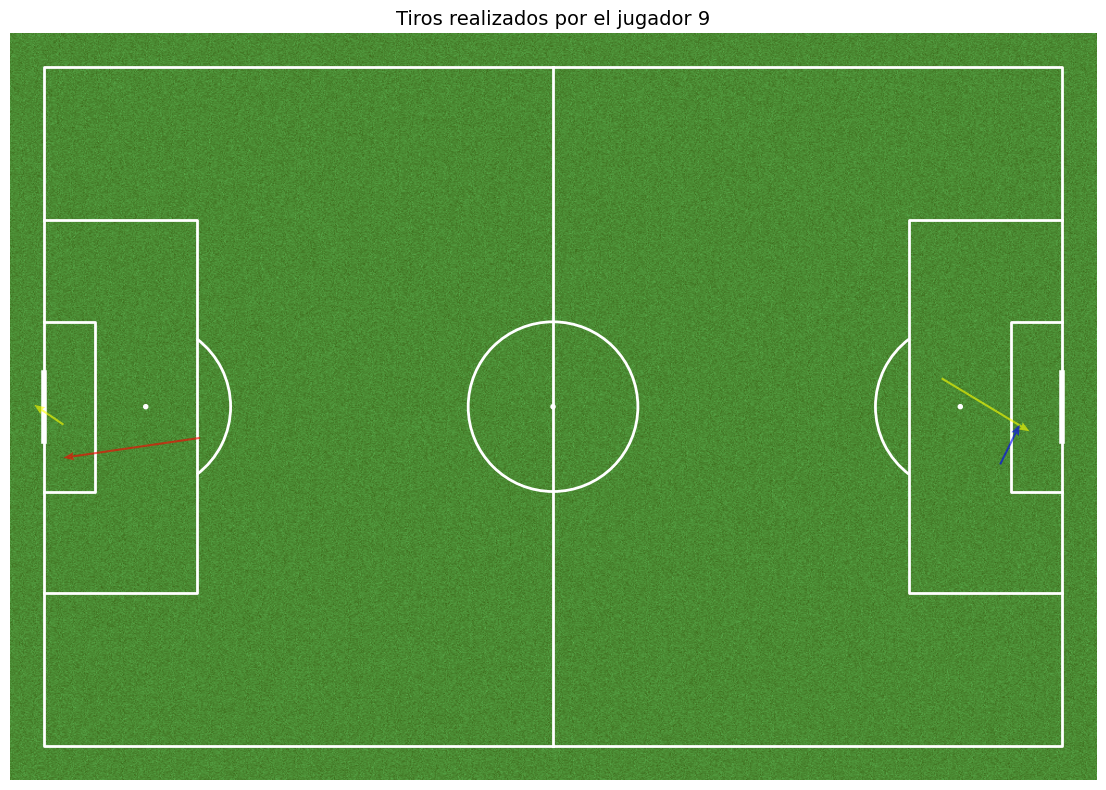

In [ ]:
# Podemos hacer un análisis del rendimiento de un jugador en distintos aspectos del partido, por ejemplo en este caso con los tiros:

# Seleccionamos primero los datos a mostrar:
df_shots_9 = Events_detection[
    (Events_detection['Type'] == 'SHOT') &
    (Events_detection['Team'] == 'Home')&
    (Events_detection['From'] == 'Player9')
]
# Vamos a definir las 3 categorías, gol, a puerta fallado y fuera:

df_goal = df_shots_9[ 
    df_shots_9['Subtype'].str.contains('GOAL', case=False, na=False)
]
df_out = df_shots_9[
    df_shots_9['Subtype'].str.contains('OFF|OUT', case=False, na = False)
]
df_ontarget = df_shots_9[
    ~df_shots_9.index.isin(df_goal.index) &
    ~df_shots_9.index.isin(df_out.index)
]

# Dibujamos el campo:
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
fig, ax = pitch.draw(figsize=(12, 8))

# Dibujamos las distinas flechas:
pitch.arrows(
            df_goal['Start X'] * 115, df_goal['Start Y'] * 78,
            df_goal['End X'] * 115, df_goal['End Y'] * 78,
            ax = ax, color = 'yellow', width = 1.5, headwidth = 4, alpha = 0.6, label = 'goal'
        )
pitch.arrows(
            df_ontarget['Start X'] * 115, df_ontarget['Start Y'] * 78,
            df_ontarget['End X'] * 115, df_ontarget['End Y'] * 78,
            ax = ax, color = 'blue', width = 1.5, headwidth = 4, alpha = 0.6, label = 'on target', linestyle = '--'
        )
pitch.arrows(
            df_out['Start X'] * 115, df_out['Start Y'] * 78,
            df_out['End X'] * 115, df_out['End Y'] * 78,
            ax = ax, color = 'red', width = 1.5, headwidth = 4, alpha = 0.6, label = 'out', linestyle = '--'
        )

# Ahora ponemos los distintos títulos:
plt.title('Tiros realizados por el jugador 9', fontsize=14)
plt.tight_layout()
plt.show()

## Vamos ahora a analizar el tracking de ambos equipos:

In [ ]:
# Leer el archivo usando encabezado multinivel
Away_tracking = pd.read_csv("Sample_Game_1_RawTrackingData_Away_Team.csv", header=[0, 1], skiprows = 1)


In [ ]:
# Cambiamos primero el nombre de las columnas:
Away_tracking.columns = [
    'Period', 'Frame', 'Time [s]',         
    'Player25_x', 'Player25_y',
    'Player15_x', 'Player15_y',
    'Player16_x', 'Player16_y',
    'Player17_x', 'Player17_y',
    'Player18_x', 'Player18_y',
    'Player19_x', 'Player19_y',
    'Player20_x', 'Player20_y',
    'Player21_x', 'Player21_y',
    'Player22_x', 'Player22_y',
    'Player23_x', 'Player23_y',
    'Player24_x', 'Player24_y',
    'Player26_x', 'Player26_y',
    'Player27_x', 'Player27_y',
    'Player28_x', 'Player28_y',
    'Ball_x', 'Ball_y'                     
]

Away_tracking.head()

,Period,Frame,Time [s],Player25_x,Player25_y,Player15_x,Player15_y,Player16_x,Player16_y,Player17_x,...,Player24_x,Player24_y,Player26_x,Player26_y,Player27_x,Player27_y,Player28_x,Player28_y,Ball_x,Ball_y
0,1,1,0.04,0.90509,0.47462,0.58393,0.20794,0.67658,0.46710,0.67310,...,0.37833,0.27383,NaN,NaN,NaN,NaN,NaN,NaN,0.45472,0.38709
1,1,2,0.08,0.90494,0.47462,0.58393,0.20794,0.67658,0.46710,0.67310,...,0.37833,0.27383,NaN,NaN,NaN,NaN,NaN,NaN,0.49645,0.40656
2,1,3,0.12,0.90434,0.47463,0.58393,0.20794,0.67658,0.46710,0.67310,...,0.37833,0.27383,NaN,NaN,NaN,NaN,NaN,NaN,0.53716,0.42556
3,1,4,0.16,0.90377,0.47463,0.58351,0.20868,0.67640,0.46762,0.67279,...,0.37756,0.27473,NaN,NaN,NaN,NaN,NaN,NaN,0.55346,0.42231
4,1,5,0.20,0.90324,0.47464,0.58291,0.21039,0.67599,0.46769,0.67253,...,0.37663,0.27543,NaN,NaN,NaN,NaN,NaN,NaN,0.55512,0.40570


In [ ]:
# Vamos a extraer los datos del balón
df_ball_away = Away_tracking[["Frame", "Time [s]", "Ball_x", "Ball_y"]].copy()
df_ball_away["player_id"] = "Ball"
df_ball_away.rename(columns={"Ball_x": "x", "Ball_y": "y"}, inplace=True)
df_ball_away = df_ball_away[["Frame", "Time [s]", "player_id", "x", "y"]]

In [ ]:
#Reestructuramos el dataset a formato largo 
cols_fijas = ['Period', 'Frame', 'Time [s]', 'Ball_x', 'Ball_y']
cols_jugadores = [col for col in Away_tracking.columns if col not in cols_fijas]

jugadores = sorted(set(col.split("_")[0] for col in cols_jugadores))

data_larga = []

for jugador in jugadores:
    col_x = f"{jugador}_x"
    col_y = f"{jugador}_y"
    if col_x in Away_tracking.columns and col_y in Away_tracking.columns:
        temp_df = Away_tracking[["Frame", "Time [s]", col_x, col_y]].copy()
        temp_df.columns = ["Frame", "Time [s]", "x", "y"]
        temp_df["player_id"] = jugador
        data_larga.append(temp_df)

Players_Away_tracking = pd.concat(data_larga, ignore_index=True)
Players_Away_tracking = Players_Away_tracking[["Frame", "Time [s]", "player_id", "x", "y"]]

,Frame,Time [s],player_id,x,y
0,1,0.04,Player15,0.58393,0.20794
1,2,0.08,Player15,0.58393,0.20794
2,3,0.12,Player15,0.58393,0.20794
3,4,0.16,Player15,0.58351,0.20868
4,5,0.20,Player15,0.58291,0.21039


In [ ]:
## Vemos ahora el de los jugadores:
df_ball_away.head()

,Frame,Time [s],player_id,x,y
0,1,0.04,Ball,0.45472,0.38709
1,2,0.08,Ball,0.49645,0.40656
2,3,0.12,Ball,0.53716,0.42556
3,4,0.16,Ball,0.55346,0.42231
4,5,0.20,Ball,0.55512,0.40570


In [ ]:
# Ahora podemos hacer lo mismo pero para el de HOME:
Home_tracking = pd.read_csv("Sample_Game_1_RawTrackingData_Home_Team.csv", header=[0, 1], skiprows = 1)


In [ ]:
# Cambiamos el nombre de las columnas:
Home_tracking.columns = [
    'Period', 'Frame', 'Time [s]',
    'Player11_x', 'Player11_y',
    'Player1_x',  'Player1_y',
    'Player2_x',  'Player2_y',
    'Player3_x',  'Player3_y',
    'Player4_x',  'Player4_y',
    'Player5_x',  'Player5_y',
    'Player6_x',  'Player6_y',
    'Player7_x',  'Player7_y',
    'Player8_x',  'Player8_y',
    'Player9_x',  'Player9_y',
    'Player10_x', 'Player10_y',
    'Player12_x', 'Player12_y',
    'Player13_x', 'Player13_y',
    'Player14_x', 'Player14_y',
    'Ball_x',     'Ball_y'
]

In [ ]:
## Vamos a separar también el balón del dataset home:
df_ball_home = Home_tracking[["Frame", "Time [s]", "Ball_x", "Ball_y"]].copy()
df_ball_home["player_id"] = "Ball"
df_ball_home.rename(columns={"Ball_x": "x", "Ball_y": "y"}, inplace=True)
df_ball_home = df_ball_home[["Frame", "Time [s]", "player_id", "x", "y"]]

In [ ]:
# Pasamos también este dataset al formato largo:
cols_fijas = ['Period', 'Frame', 'Time [s]', 'Ball_x', 'Ball_y']
cols_jugadores = [col for col in Home_tracking.columns if col not in cols_fijas]

jugadores = sorted(set(col.split("_")[0] for col in cols_jugadores))

data_larga = []

for jugador in jugadores:
    col_x = f"{jugador}_x"
    col_y = f"{jugador}_y"
    if col_x in Home_tracking.columns and col_y in Home_tracking.columns:
        temp_df = Home_tracking[["Frame", "Time [s]", col_x, col_y]].copy()
        temp_df.columns = ["Frame", "Time [s]", "x", "y"]
        temp_df["player_id"] = jugador
        data_larga.append(temp_df)

Players_Home_tracking = pd.concat(data_larga, ignore_index=True)
Players_Home_tracking = Players_Home_tracking[["Frame", "Time [s]", "player_id", "x", "y"]]

In [ ]:
Players_Home_tracking.head()

,Frame,Time [s],player_id,x,y
0,1,0.04,Player1,0.32648,0.65322
1,2,0.08,Player1,0.32648,0.65322
2,3,0.12,Player1,0.32648,0.65322
3,4,0.16,Player1,0.32622,0.65317
4,5,0.20,Player1,0.32597,0.65269


In [ ]:
df_ball_home.head()

,Frame,Time [s],player_id,x,y
0,1,0.04,Ball,0.45472,0.38709
1,2,0.08,Ball,0.49645,0.40656
2,3,0.12,Ball,0.53716,0.42556
3,4,0.16,Ball,0.55346,0.42231
4,5,0.20,Ball,0.55512,0.40570


In [ ]:
# Concatenamos ambos datasets:
Players_tracking  = pd.concat([Players_Home_tracking, Players_Away_tracking], ignore_index=True)

# Ordenamos el dataset por frame para visualizarlo mejor:
Players_tracking = Players_tracking.sort_values(by = 'Frame').reset_index(drop=True)

In [ ]:
# Visualizamos el dataset final:
Players_tracking.head()

In [ ]:
# Por último guardamos los datasets:
Players_tracking.to_csv('Players_tracking.csv', index = False)
df_ball_away.to_csv('Ball_tracking.csv', index=False)